## Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [3]:
df = pd.read_csv("Road Accident Data.csv")

In [4]:
df.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


## Converting Accident date to date-time format and setting as index

In [5]:
df['Accident Date'].dtype

dtype('O')

In [6]:
pd.to_datetime(df['Accident Date'])

0        2021-01-01
1        2021-01-05
2        2021-01-04
3        2021-01-05
4        2021-01-06
            ...    
307968   2022-02-18
307969   2022-02-21
307970   2022-02-23
307971   2022-02-23
307972   2022-02-28
Name: Accident Date, Length: 307973, dtype: datetime64[ns]

In [7]:
df.set_index('Accident Date', inplace=True)

In [8]:
df.head()

,Accident_Index,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
Accident Date,,,,,,,,,,,,,,,,,,,,
1/1/2021,200901BS70001,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,-0.201349,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1/5/2021,200901BS70002,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,-0.199248,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
1/4/2021,200901BS70003,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,-0.179599,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
1/5/2021,200901BS70004,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,-0.203110,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
1/6/2021,200901BS70005,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,-0.173445,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307973 entries, 1/1/2021 to 2/28/2022
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Day_of_Week                 307973 non-null  object 
 2   Junction_Control            307973 non-null  object 
 3   Junction_Detail             307973 non-null  object 
 4   Accident_Severity           307973 non-null  object 
 5   Latitude                    307973 non-null  float64
 6   Light_Conditions            307973 non-null  object 
 7   Local_Authority_(District)  307973 non-null  object 
 8   Carriageway_Hazards         5424 non-null    object 
 9   Longitude                   307973 non-null  float64
 10  Number_of_Casualties        307973 non-null  int64  
 11  Number_of_Vehicles          307973 non-null  int64  
 12  Police_Force                307973 non-null  object 
 13  Road_Surf

## Checking null values

In [10]:
df.isna().sum()

Accident_Index                     0
Day_of_Week                        0
Junction_Control                   0
Junction_Detail                    0
Accident_Severity                  0
Latitude                           0
Light_Conditions                   0
Local_Authority_(District)         0
Carriageway_Hazards           302549
Longitude                          0
Number_of_Casualties               0
Number_of_Vehicles                 0
Police_Force                       0
Road_Surface_Conditions          317
Road_Type                       1534
Speed_limit                        0
Time                              17
Urban_or_Rural_Area                0
Weather_Conditions              6057
Vehicle_Type                       0
dtype: int64

Insight: Since the Carriageway_Hazards column has huge number of null values, so it is better to drop this column.

In [11]:
df.drop('Carriageway_Hazards',axis=1, inplace=True)

In [12]:
df.fillna('unknown', inplace=True)

In [13]:
df.isna().sum()

Accident_Index                0
Day_of_Week                   0
Junction_Control              0
Junction_Detail               0
Accident_Severity             0
Latitude                      0
Light_Conditions              0
Local_Authority_(District)    0
Longitude                     0
Number_of_Casualties          0
Number_of_Vehicles            0
Police_Force                  0
Road_Surface_Conditions       0
Road_Type                     0
Speed_limit                   0
Time                          0
Urban_or_Rural_Area           0
Weather_Conditions            0
Vehicle_Type                  0
dtype: int64

In [14]:
df.head()

,Accident_Index,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
Accident Date,,,,,,,,,,,,,,,,,,,
1/1/2021,200901BS70001,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,-0.201349,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1/5/2021,200901BS70002,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,-0.199248,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
1/4/2021,200901BS70003,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,-0.179599,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
1/5/2021,200901BS70004,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,-0.203110,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
1/6/2021,200901BS70005,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,-0.173445,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


## Checking for duplicate data and removing if exists.

In [15]:
df.duplicated().sum()

1

In [16]:
df.drop_duplicates(inplace=True)

#### Removing Accident_Index as it is not that much useful for EDA

In [17]:
df.drop('Accident_Index', axis=1, inplace=True)

In [18]:
cat_cols = [i for i in df.columns if df[i].dtype == 'O']
cat_cols.remove('Time')

In [19]:
df['Accident_Severity'].value_counts()

Accident_Severity
Slight     263279
Serious     40740
Fatal        3904
Fetal          49
Name: count, dtype: int64

In [20]:
df['Accident_Severity'] = df['Accident_Severity'].replace('Fetal', 'Fatal')

In [21]:
df['Accident_Severity'].value_counts()

Accident_Severity
Slight     263279
Serious     40740
Fatal        3953
Name: count, dtype: int64

Text(1.0, 1.0, 'Weather Condition vs Road type')

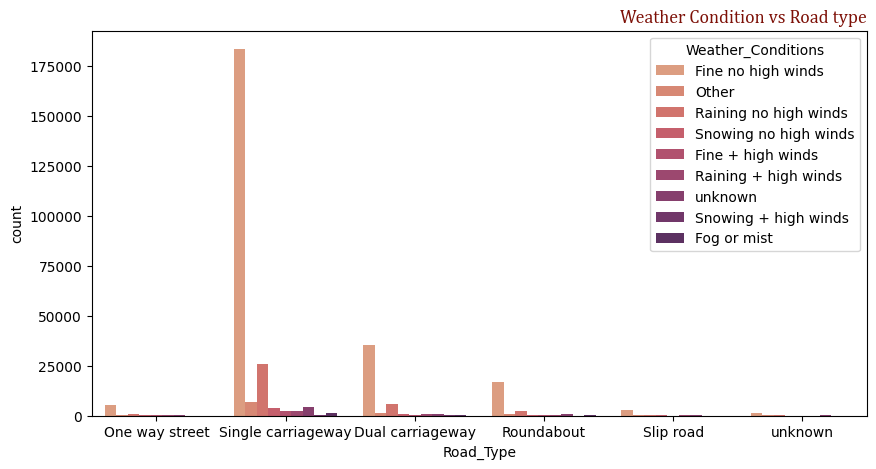

In [22]:
plt.figure(figsize=(10, 5))
sns.countplot(df, x='Road_Type', hue='Weather_Conditions', palette='flare')
plt.title("Weather Condition vs Road type", font="Cambria", loc='right', color='#7D1007', fontsize=13)

Insight: Most of the accidents have taken place in fine weather and in single carriageway, dual carriageway and roundabout streets.

Text(1.0, 1.0, 'Road Type vs Light Condition')

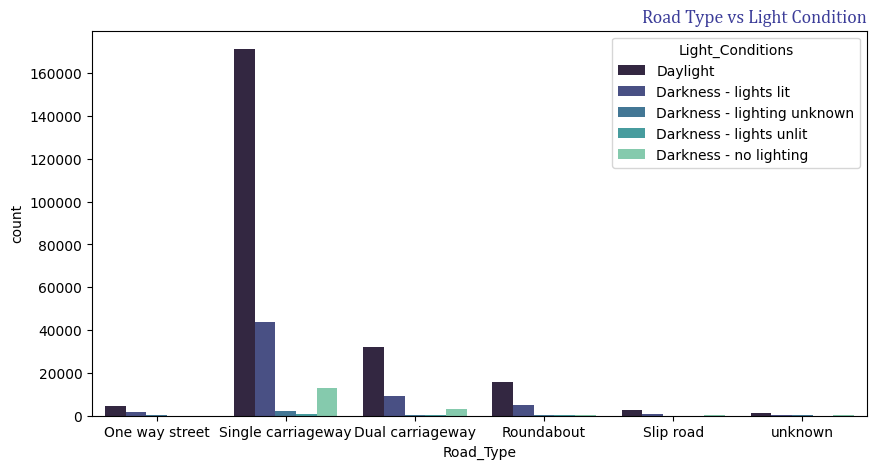

In [23]:
plt.figure(figsize=(10, 5))
sns.countplot(df, x='Road_Type', hue='Light_Conditions', palette='mako')
plt.title("Road Type vs Light Condition", font="Cambria", loc='right', color='#3C3D99', fontsize=13)

Insight: Most of the accidents have taken place in the afforsiad streets even in day light.

Text(1.0, 1.0, 'Weather Condition vs Light Condition')

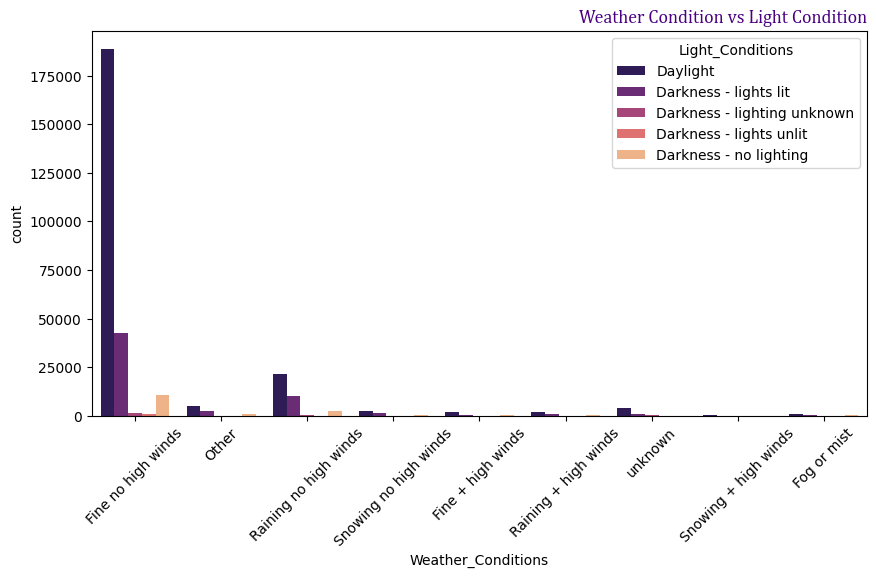

In [24]:
plt.figure(figsize=(10, 5))
sns.countplot(df, x='Weather_Conditions', hue='Light_Conditions', palette='magma')
plt.xticks(rotation = 45)
plt.title("Weather Condition vs Light Condition", font="Cambria", loc='right', color='indigo', fontsize=13)

Insight: Most of the accidents have taken place in day time and in fine weather.


Insight: It can be concluded that the single carriageway and dual carriageway streets are much dangerous even in fine weather and daylight. Or the people being too much casual about driving through roads.

Text(1.0, 1.0, 'Accidental Hotspot Map')

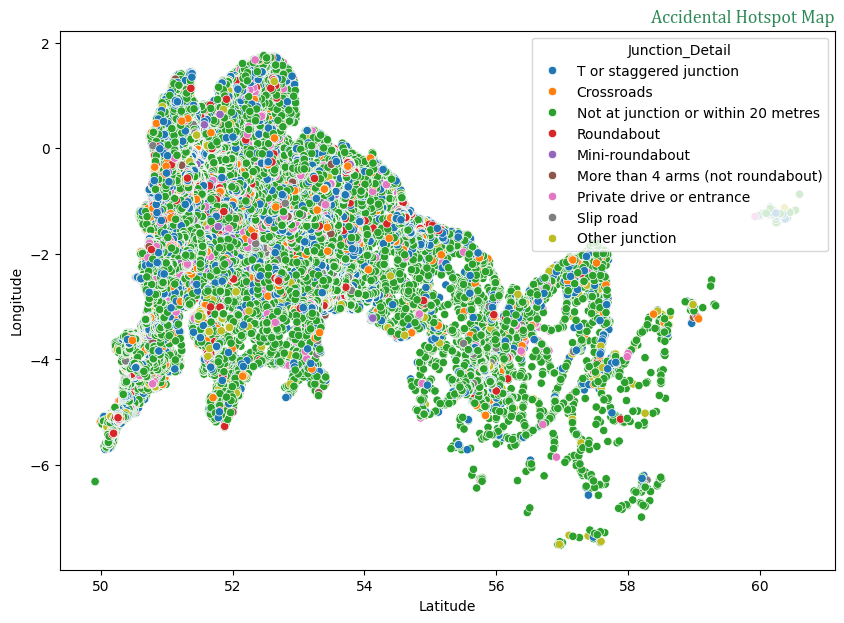

In [25]:
plt.figure(figsize=(10, 7))
sns.scatterplot(df, x='Latitude',y='Longitude', hue='Junction_Detail')
plt.title("Accidental Hotspot Map", font="Cambria", loc='right', color='seagreen', fontsize=13)

Insight: Here is the accident hotspot map which shows most of the accidents have taken places which are not probably junctions. may be in a one carriageway or dual carriageway streets which are distant from junctions about 20 m.

Text(1.0, 1.0, 'Accident Severity Ratio')

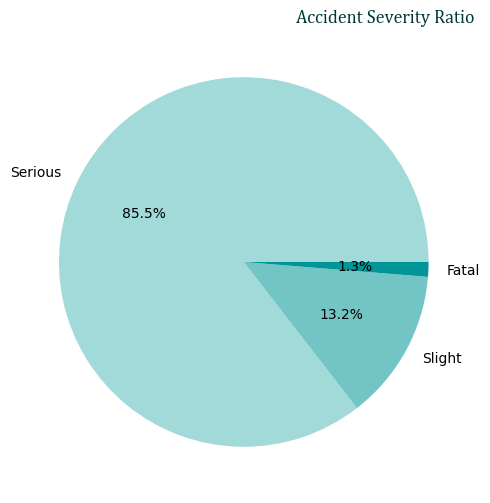

In [26]:
plt.figure(figsize=(8,6))
plt.pie(df['Accident_Severity'].value_counts(), labels=df['Accident_Severity'].unique(),colors=['#A2D9D9','#73C5C5', '#009596'], autopct='%1.1f%%')
plt.title("Accident Severity Ratio", font="Cambria", loc='right', color='#003737', fontsize=13)

Insight: Though the fatal accidental rate is very low, but 85.5% serious accidents have taken place. 13.2% of slight accidents have been there.

In [27]:
df.head()

,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
Accident Date,,,,,,,,,,,,,,,,,,
1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,-0.201349,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,-0.199248,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,-0.179599,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,-0.203110,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,-0.173445,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


Text(1.0, 1.0, 'No of Vehicles vs Speed of Vehicles')

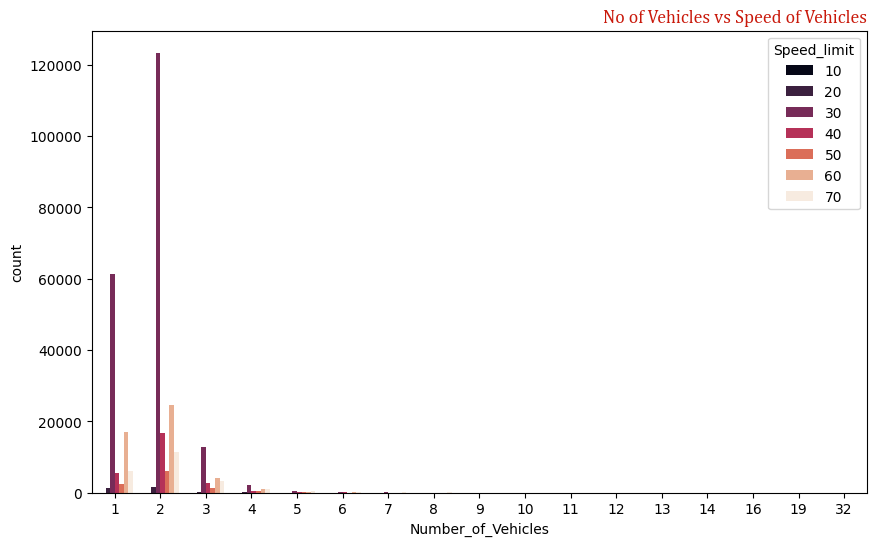

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(df, x='Number_of_Vehicles', hue='Speed_limit', palette='rocket')
plt.title("No of Vehicles vs Speed of Vehicles", font="Cambria", loc='right', color='#C9190B', fontsize=13)

Insight: Mostly the accidents have taken place between 2 vehicles by count and at a speed of 30 km/h by speed. In secound place, its the accidents by single vehicle. This shows quite a few casualities by tresspassers and drivers.

Text(1.0, 1.0, 'Road Condition vs Weather Condition')

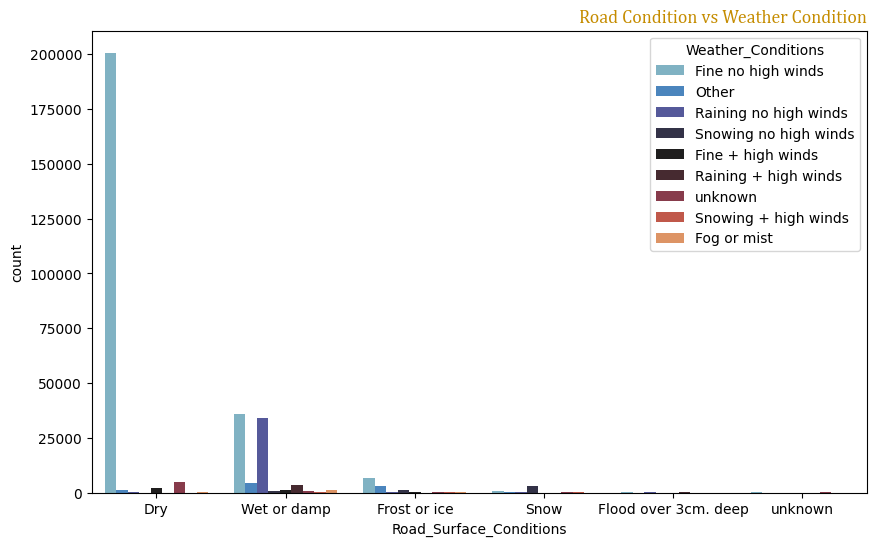

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(df, x='Road_Surface_Conditions', hue='Weather_Conditions', palette='icefire')
plt.title("Road Condition vs Weather Condition", font="Cambria", loc='right', color='#C58C00', fontsize=13)

Insight: Some of the accidents have taken place in wet/damp road while raining, may be due to loosing control on slippery surface and weather. But, maximum of accidents have taken place in fine weather and dry roads.